In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


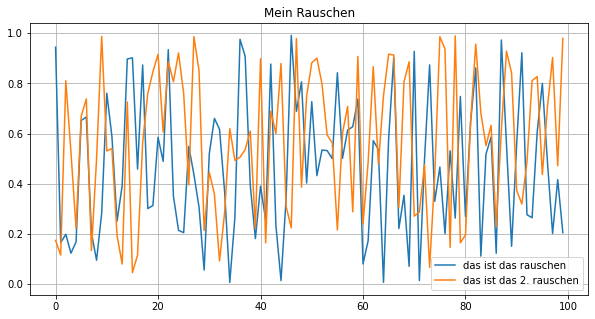

In [2]:
figure(figsize=[10,5])
noise = random.random(100)
plot(noise, label='das ist das rauschen')

noise = random.random(100)
plot(noise, label='das ist das 2. rauschen')

title('Mein Rauschen')
legend()
grid()


In [3]:
sr = 10000 #Hz
T = 0.1 #sec
N = int(sr*T) #total num Samples
n = arange(N)
t = n/sr 

In [4]:
arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
N

1000

<StemContainer object of 3 artists>

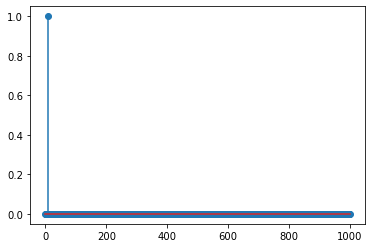

In [6]:
impulse = zeros(N)
impulse[10] = 1
stem(impulse)

Text(0.5, 0, 'time[sec]')

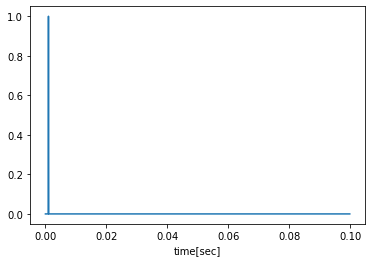

In [7]:
plot(t, impulse)
xlabel('time[sec]')

In [8]:
x = arange(10)

In [9]:
x1 = roll(x,1)
x1[0]=0
x1

array([0, 0, 1, 2, 3, 4, 5, 6, 7, 8])

In [10]:
pad(x,[1,0],)

array([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# One Zero Filter
Reference: https://ccrma.stanford.edu/~jos/fp/One_Zero.html

$$ y(n) = x(n) \cdot b_0 + x(n-1) \cdot b_1 $$

$$ y(n) = ( x(n)  + x(n-1) ) \cdot b $$


In [11]:
def oneZero(x, b0=0.5, b1=0.5):
    x1 = roll(x,1)
    x1[0]=0
    y = x*b0+x1*b1
    return y

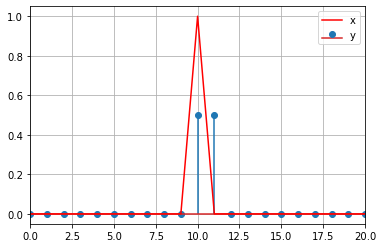

In [12]:
b0 = 0.5
b1 = 0.5
x = impulse
y = oneZero(impulse, b0=b0, b1=b1)
stem(y, label='y')
plot(x, label='x', color='r')
legend()
xlim([0,20])
grid()

In [13]:
# clf()

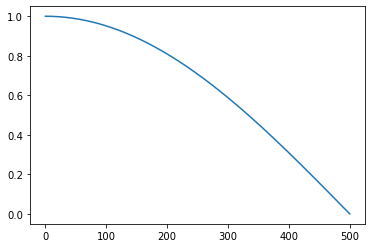

In [14]:
spec = fft.rfft(y)
magnitude = abs(spec)
_ = plot(magnitude)

Text(0.5, 1.0, 'magnitudes pectrum')

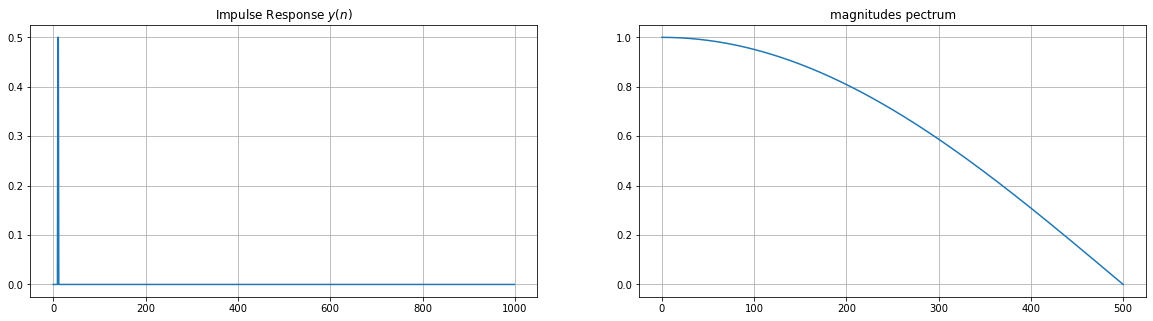

In [15]:
figure(figsize=[20,5])
subplot(121)
plot(y)
grid()
title('Impulse Response $y(n)$')

subplot(122)
plot(magnitude)
grid()
title('magnitudes pectrum')
# show()

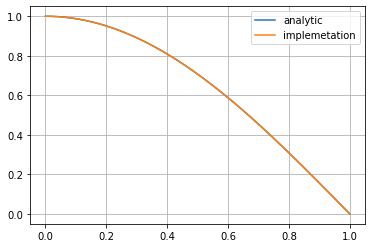

In [16]:
omega = linspace(0, pi, len(magnitude))
faxis = omega/pi

z = exp(1j*omega)
H = b0+b1*z
plot(faxis, abs(H), label='analytic')



faxis = linspace(0,1, len(magnitude))
plot(faxis, magnitude, label='implemetation')
legend()
grid()

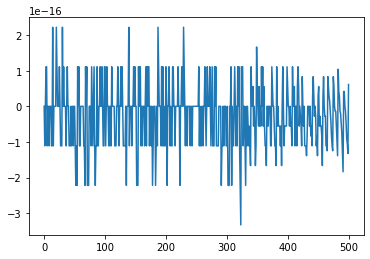

In [17]:
plot(abs(H)-magnitude)

Text(0.5, 0, '')

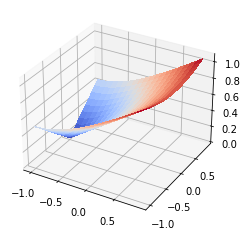

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
X = np.arange(-1, 1, 0.1)
Y = np.arange(-1, 1, 0.1)

X, Y = np.meshgrid(X, Y)
z = X+1j*Y
H = b0 + b1 * z
surf = ax.plot_surface(X, Y, abs(H), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
xlabel('')
ylabel('')


# One Pole Filter
$$ y(n) = b_0 \cdot x(n) + a_1 \cdot y(n-1) $$

# One Pole Filter

https://ccrma.stanford.edu/~jos/fp/One_Pole.html

$$ y(n) = b_0 \cdot x(n) - a_1 \cdot y(n-1) $$

In [19]:
y = zeros_like(x)
y1 = 0
alpha = 0.0
b0 = 1-alpha
a1 = - alpha
for n in range(len(x)):
    y[n] = x[n]*b0-y1*a1
    y1 = y[n]

In [20]:
def onePole(x, alpha):
    y = zeros_like(x)
    y1 = 0
#     alpha = 0.0
    b0 = 1-alpha
    a1 = -alpha
    for n in range(len(x)):
        y[n] = x[n]*b0-y1*a1
        y1 = y[n]
    return y

In [21]:
[]

[]

(0.0, 50.0)

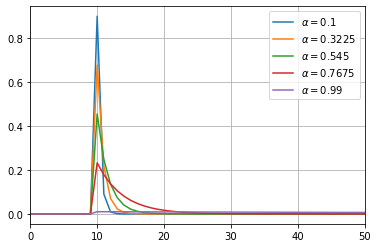

In [22]:
alphas = linspace(0.1, 0.99, 5)
for alpha in alphas:
    y = onePole(x, alpha)
    plot(y, label=r'$\alpha=$'+str(alpha))

legend()
grid()
xlim([0,50])

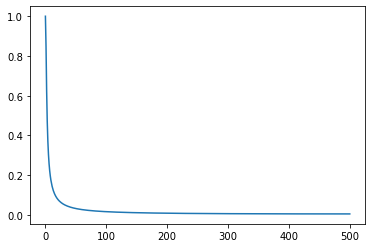

In [23]:
spec = fft.rfft(y)
magnitude = abs(spec)
_ = plot(magnitude)

In [24]:
import scipy.signal as sig

In [25]:
fp = 1000
fs = 2000
wp = fp/(sr/2)
ws = fs/(sr/2)
gpass = 10
gstop = 50

print(wp)
ordnung, wn = sig.buttord(wp, ws,gpass, gstop,fs = sr)

0.2


In [26]:
b, a = sig.butter(ordnung, wn,)

In [27]:
y = sig.lfilter(b,a,x)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


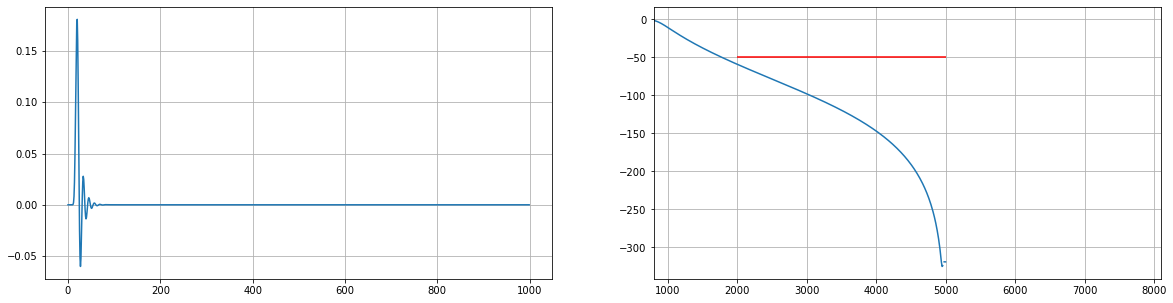

In [28]:
figure(figsize=[20, 5])
subplot(121)
plot(y)
grid()
subplot(122)
mag = 20*log10(abs(fft.rfft(y)))
faxis = linspace(0,sr/2, len(mag))
plot(faxis, mag)
hlines(-gstop, fs, sr/2, 'r')
xlim([800, 8100])
grid()


In [29]:
zpk = sig.butter(ordnung, wn,output='zpk')

In [30]:
zpk

(array([-1., -1., -1., -1., -1., -1., -1.]),
 array([0.77139955+0.44780225j, 0.65142507+0.30325782j,
        0.58812572+0.15194203j, 0.56841327+0.j        ,
        0.58812572-0.15194203j, 0.65142507-0.30325782j,
        0.77139955-0.44780225j]),
 3.506614068513736e-05)